In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:
base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print(total_train)
print(total_val)

BATCH_SIZE = 32
IMG_SHAPE = 150 

2000
1000


In [5]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
validation_image_generator = ImageDataGenerator(
    rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


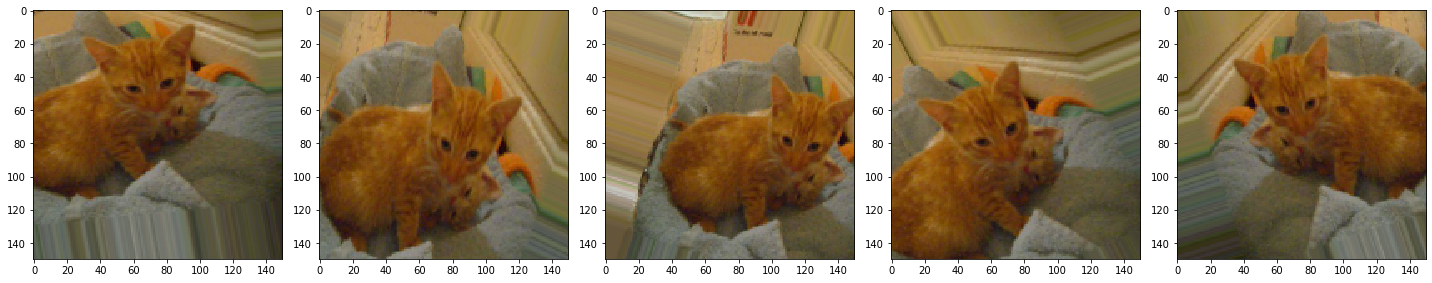

In [12]:
images = [train_data_gen[0][0][24] for i in range(5)]
plotImages(images)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
  

   
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
  
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
       
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  

    tf.keras.layers.Dropout(0.4), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    
    
    tf.keras.layers.Dense(0, activation='softmax') #[0, 1] or [1, 0]
    
    ])

In [45]:

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 256)     

In [47]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:

EPOCHS = 10

history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
    callbacks=callbacks
    )

Epoch 1/10
63/63 [==============================] - 171s 3s/step - loss: 0.6916 - accuracy: 0.5220 - val_loss: 0.6916 - val_accuracy: 0.4990
Epoch 2/10
63/63 [==============================] - 181s 3s/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6913 - val_accuracy: 0.5520
Epoch 3/10
63/63 [==============================] - 172s 3s/step - loss: 0.6912 - accuracy: 0.5155 - val_loss: 0.6895 - val_accuracy: 0.5650
Epoch 4/10
63/63 [==============================] - 168s 3s/step - loss: 0.6911 - accuracy: 0.5275 - val_loss: 0.6892 - val_accuracy: 0.5620
Epoch 5/10
63/63 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5505
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
63/63 [==============================] - 177s 3s/step - loss: 0.6892 - accuracy: 0.5505 - val_loss: 0.6888 - val_accuracy: 0.5580
Epoch 6/10
63/63 [==============================] - 172s 3s/step - loss: 0.6889 - accuracy: 0.5265 - val_loss: 0.6867 - val_accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
acc = model.evaluate(val_data_gen, steps=len(val_data_gen), verbose=0)
    
print((acc * 100 ))